In [ ]:
import numpy as np

In [ ]:
X = np.array([[1,2,], [2,2], [4,5], [6,6]], dtype=np.float64)
Y = np.array([1, 1, 0, 0], dtype=np.float64)
weights = np.array([0,0], dtype=np.float64)
intercept = 0.0
learning_rate = 0.1

In [ ]:
# Perceptron learning algorithm

# Calculate the weighted sum of inputs and weights
def weighted_sum(inputs: np.ndarray, weights: np.ndarray, intercept: float) -> float:
    return np.dot(inputs, weights) + intercept


# Get output of perceptron network as 1 or -1
def perceptron_output(
    inputs: np.ndarray, weights: np.ndarray, intercept: np.ndarray
) -> np.ndarray:
    return np.where(weighted_sum(inputs, weights, intercept) > 0, 1, -1)

# Update weights and intercept using perceptron learning algorithm
def perceptron_learning(
    inputs: np.ndarray,
    labels: np.ndarray,
    weights: np.ndarray,
    intercept: float,
    learning_rate: float,
) -> (np.ndarray, float):
    
    outputs = perceptron_output(inputs, weights, intercept)
    
    errors = np.where(outputs != labels, 1, 0) * labels
    weights += learning_rate * np.dot(errors, inputs)
    intercept += learning_rate * errors.sum()
    return weights, intercept

In [ ]:
n_epochs = 100
for e in range(n_epochs):
    print("Epoch: ", e)
    for i in range(len(X)):
        weights, intercept = perceptron_learning(X[i], Y[i], weights, intercept, learning_rate)

In [ ]:
perceptron_output(np.array([0,0]), weights, intercept)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(weights, bias, inputs, targets):
    # Generate data points for the decision boundary line
    x_vals = np.linspace(np.min(inputs[:, 0]), np.max(inputs[:, 0]), 100)
    y_vals = -(weights[0] / weights[1]) * x_vals - (bias / weights[1])

    # Plot the data points
    y_class = np.unique(targets)
    
    assert len(y_class) == 2, "Only binary classification is supported"

    plt.scatter(inputs[targets == y_class[0]][:, 0], inputs[targets == y_class[0]][:, 1], c='b', label=f'Class {y_class[0]}')
    plt.scatter(inputs[targets == y_class[1]][:, 0], inputs[targets == y_class[1]][:, 1], c='r', label=f'Class {y_class[1]}')

    # Plot the decision boundary line
    plt.plot(x_vals, y_vals, 'g', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Decision Boundary Plot')
    plt.grid(True)
    plt.show()

# Example usage:
weights = np.array([2.5, -1.5])  # Adjust these weights to change the decision boundary
bias = 5.0  # Adjust this bias to change the decision boundary

# Generate some random data points for illustration purposes
np.random.seed(42)
num_points = 50
inputs = np.random.uniform(-8, 8, size=(num_points, 2))
targets = (inputs.dot(weights) + bias > 0).astype(int)

plot_decision_boundary(weights, bias, inputs, targets)


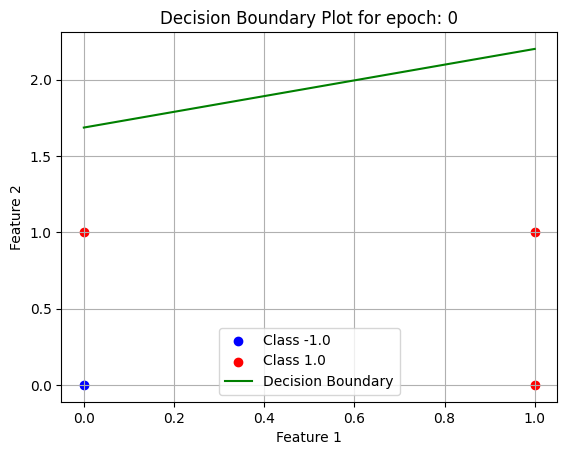

Epoch 1 Trained


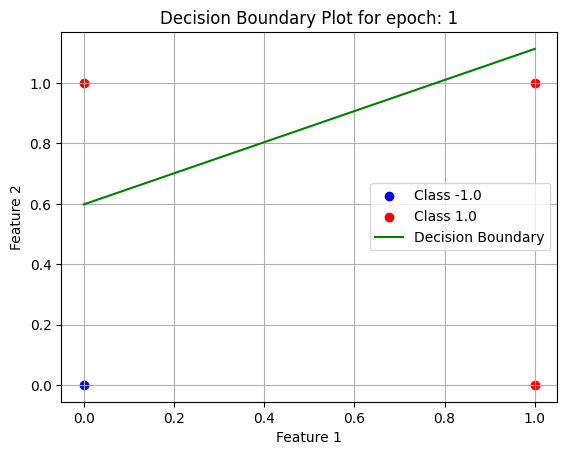

Epoch 2 Trained


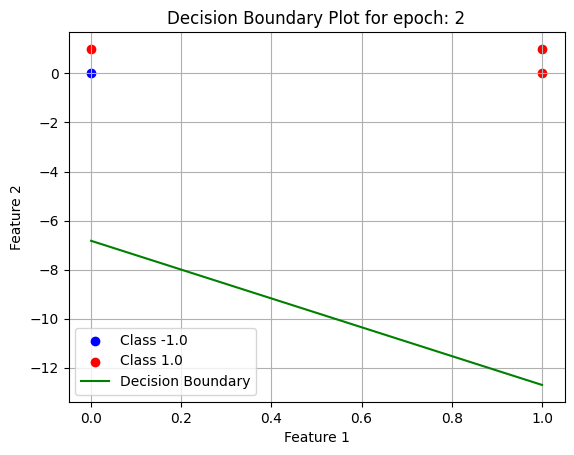

Epoch 3 Trained


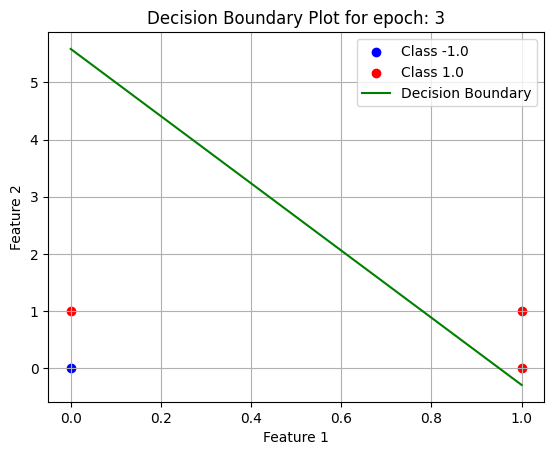

Epoch 4 Trained


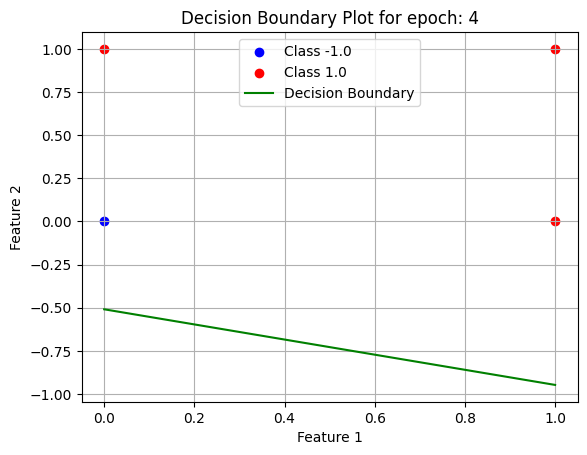

Epoch 5 Trained


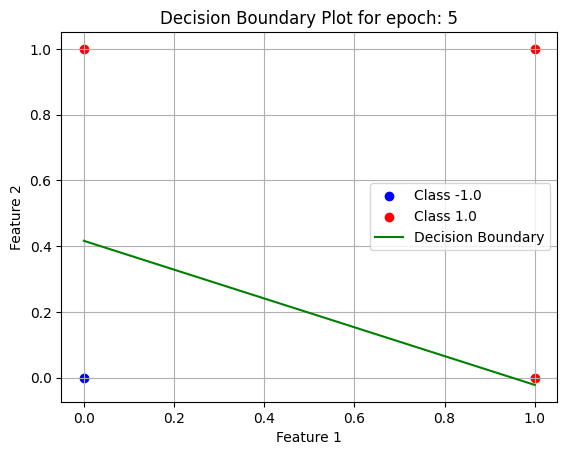

Epoch 6 Trained


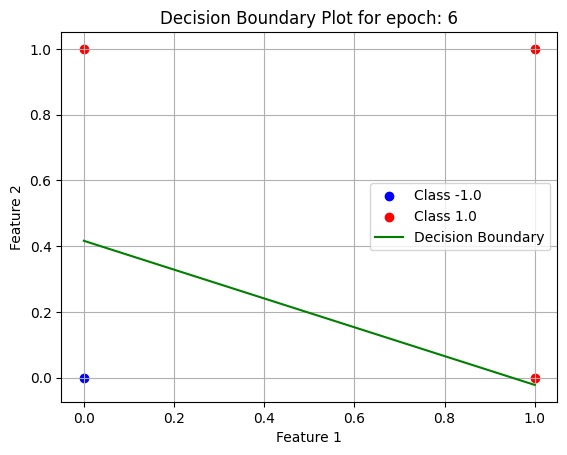

Epoch 7 Trained


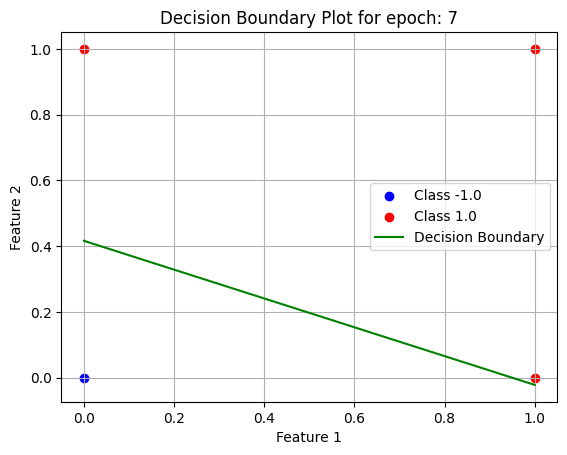

Epoch 8 Trained


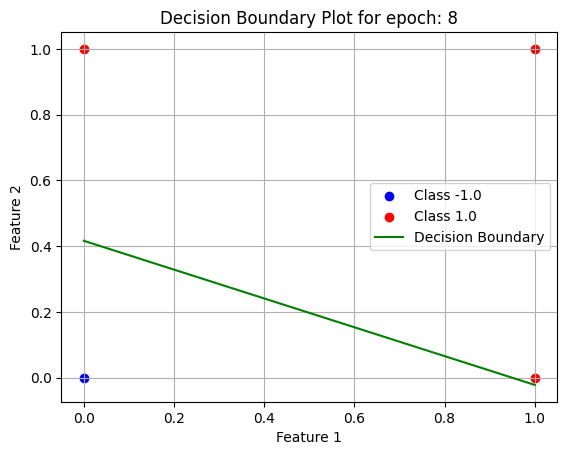

Epoch 9 Trained


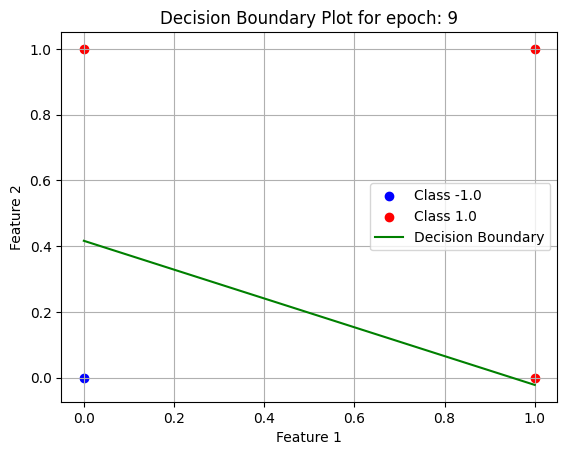

Epoch 10 Trained


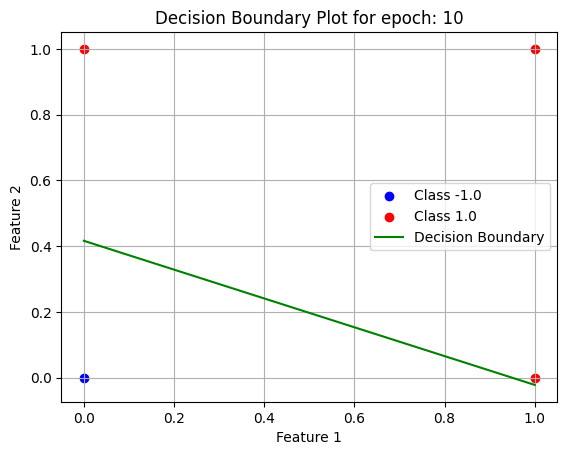

Epoch 11 Trained


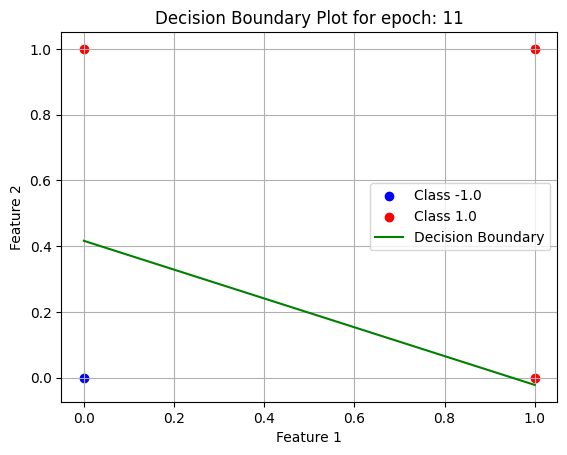

Epoch 12 Trained


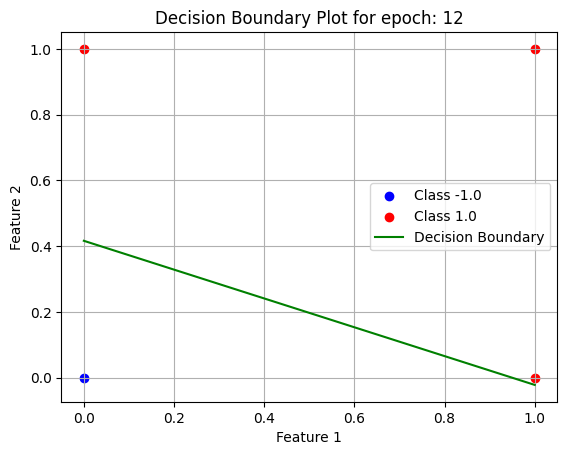

Epoch 13 Trained


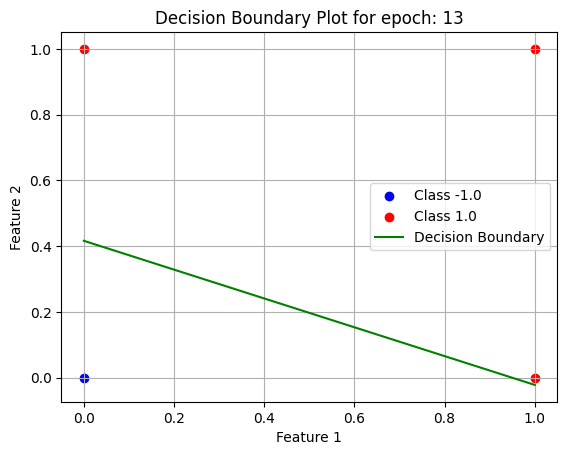

Epoch 14 Trained


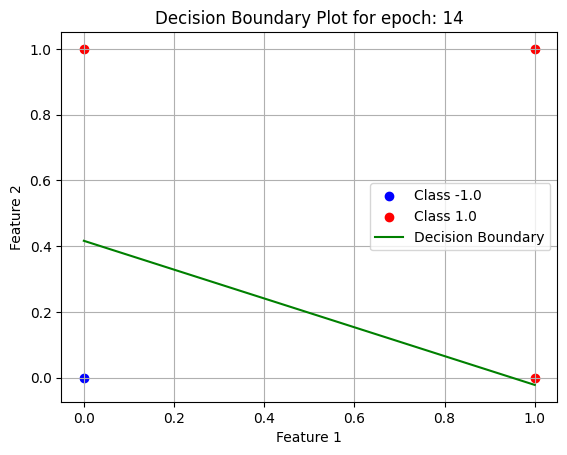

Epoch 15 Trained


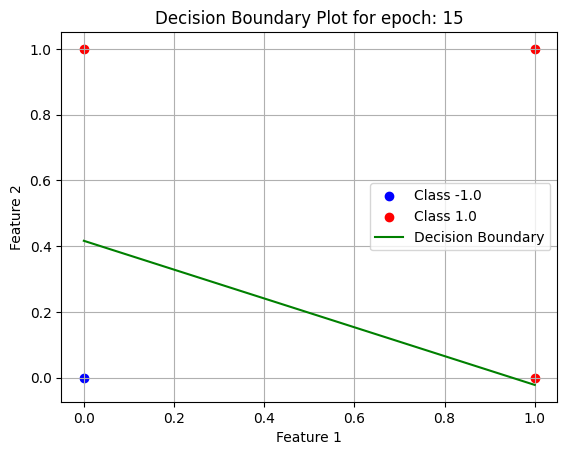

Epoch 16 Trained


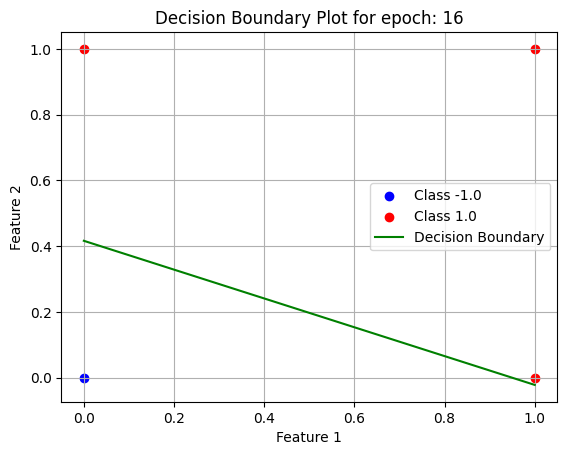

Epoch 17 Trained


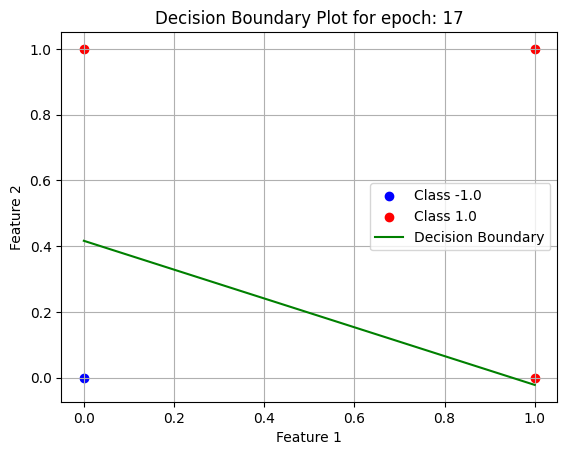

Epoch 18 Trained


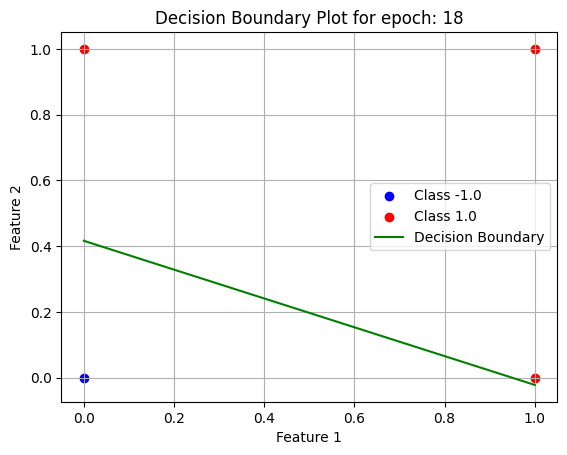

Epoch 19 Trained


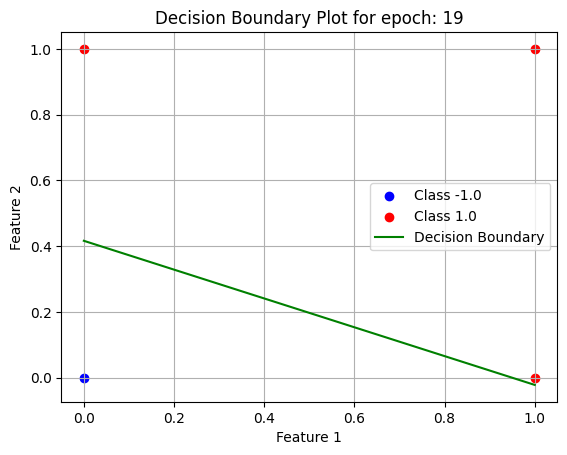

Epoch 20 Trained


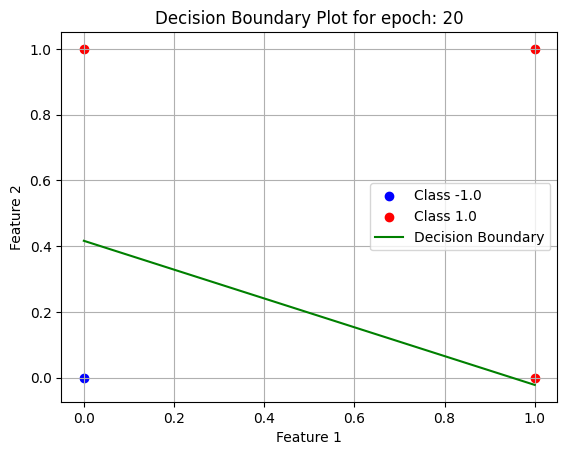

Epoch 21 Trained


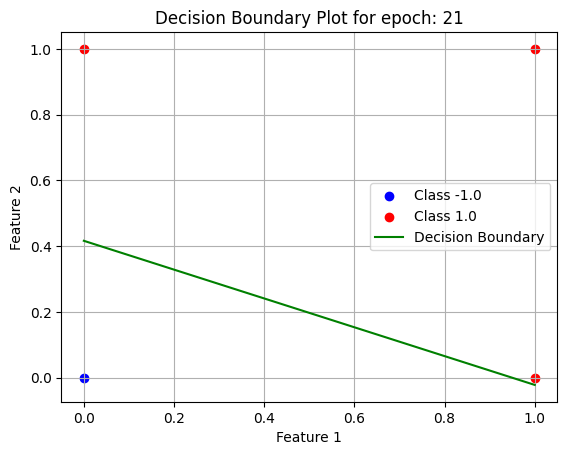

Epoch 22 Trained


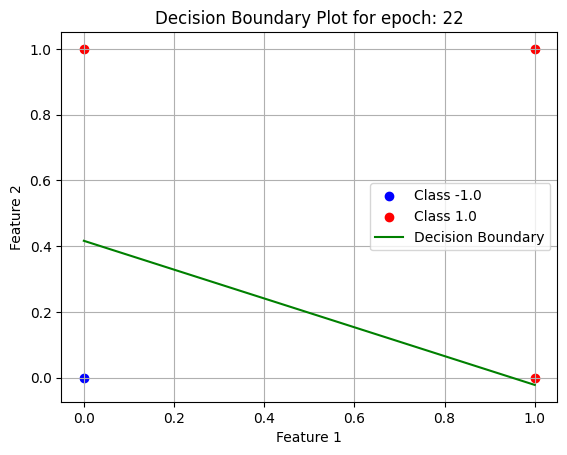

Epoch 23 Trained


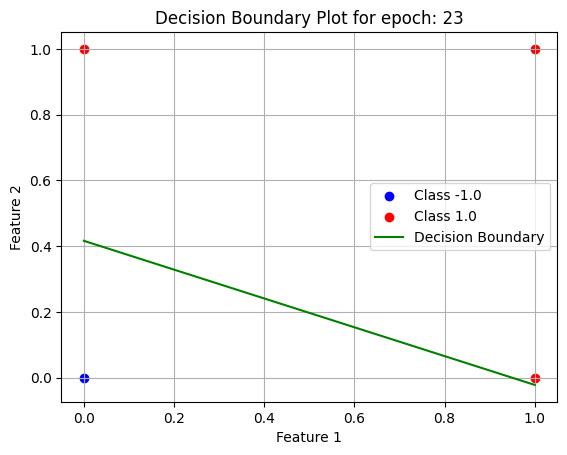

Epoch 24 Trained


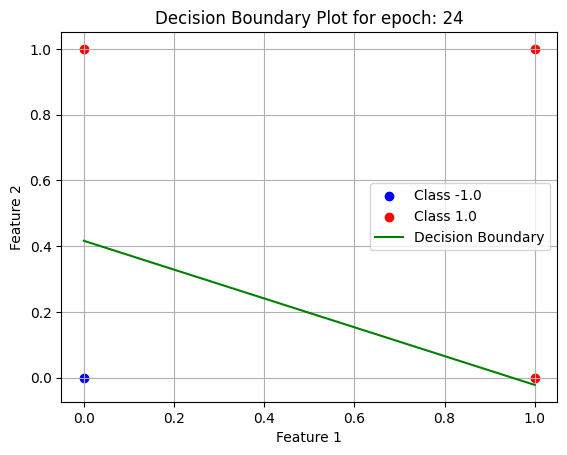

Epoch 25 Trained


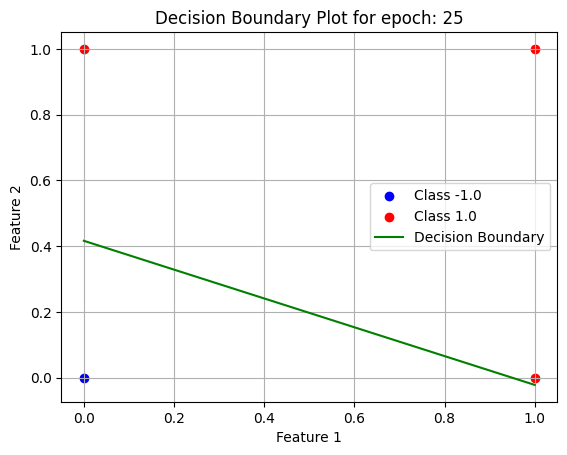

Epoch 26 Trained


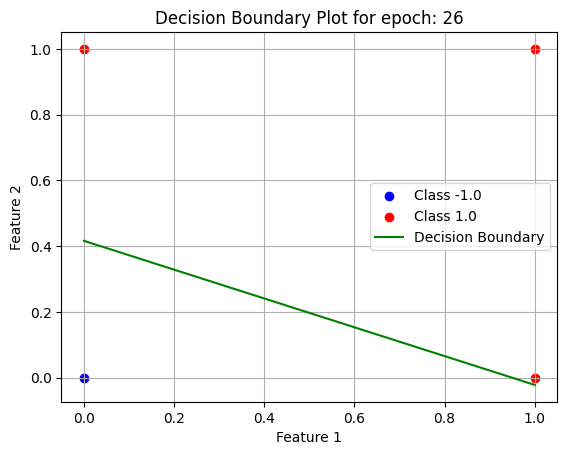

Epoch 27 Trained


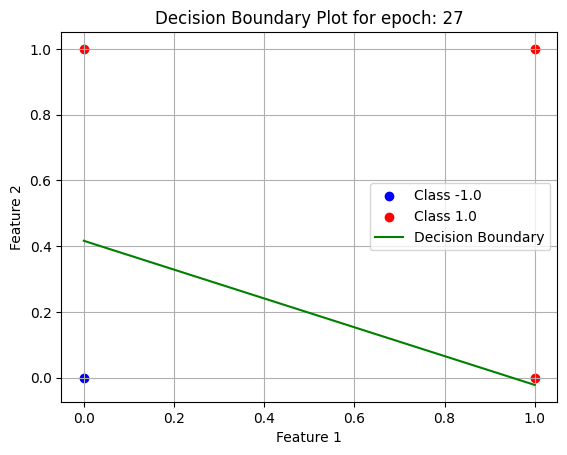

Epoch 28 Trained


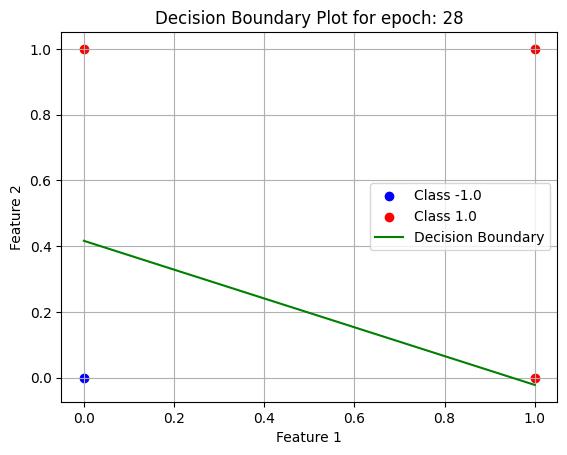

Epoch 29 Trained


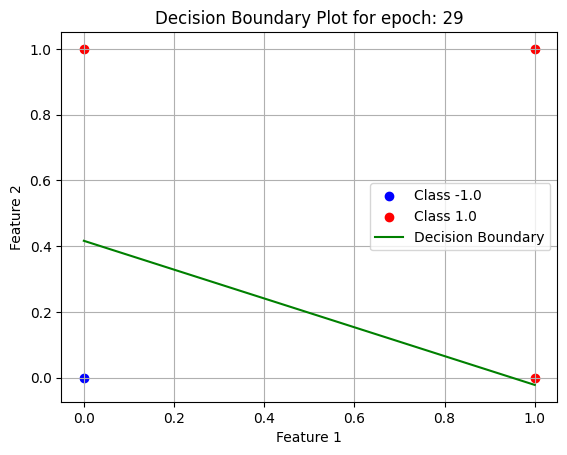

Epoch 30 Trained


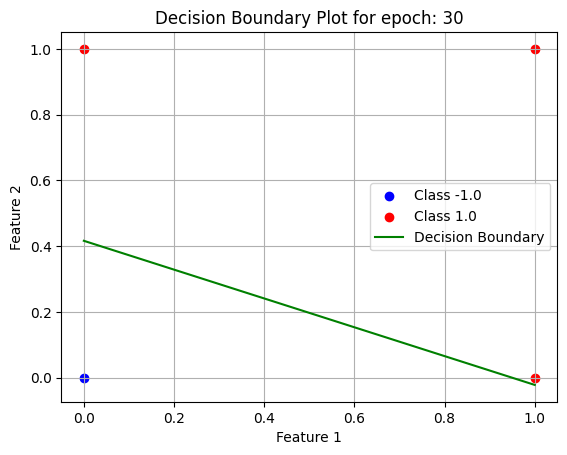

Epoch 31 Trained


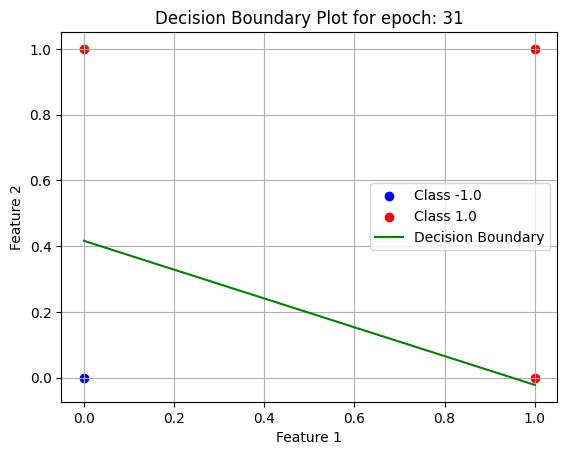

Epoch 32 Trained


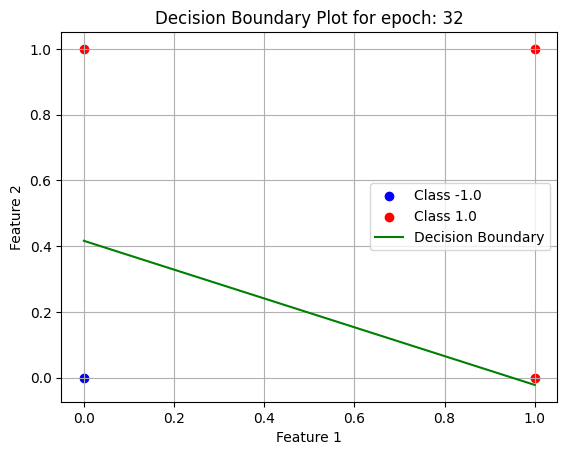

Epoch 33 Trained


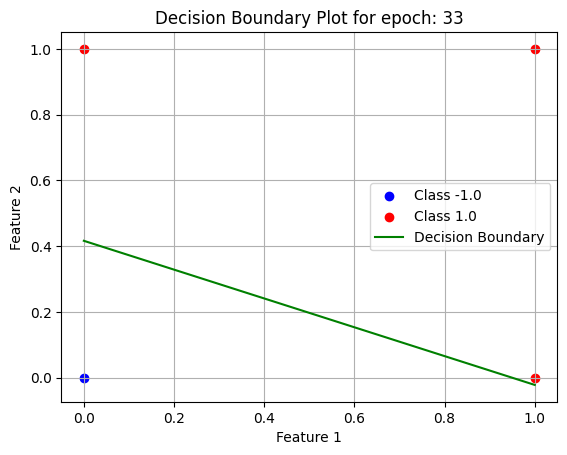

Epoch 34 Trained


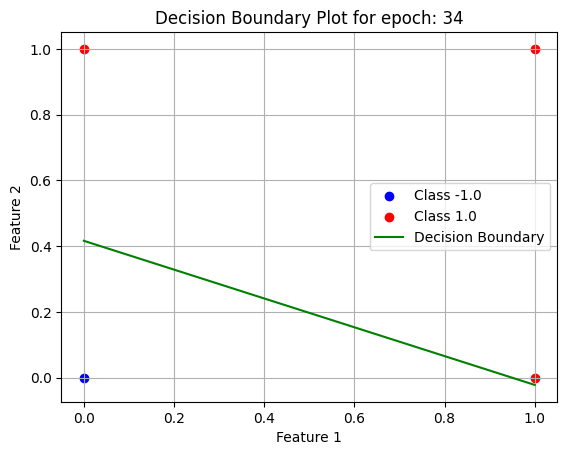

Epoch 35 Trained


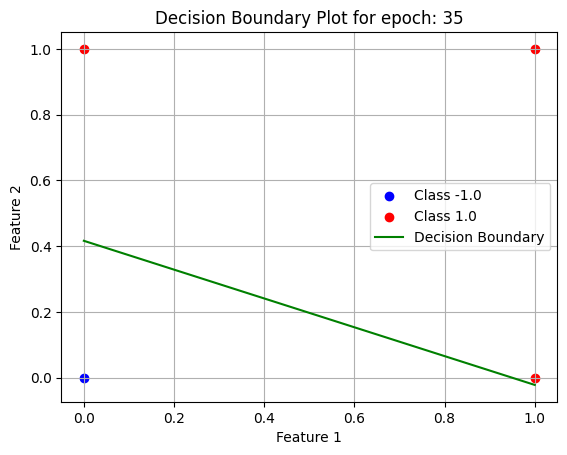

Epoch 36 Trained


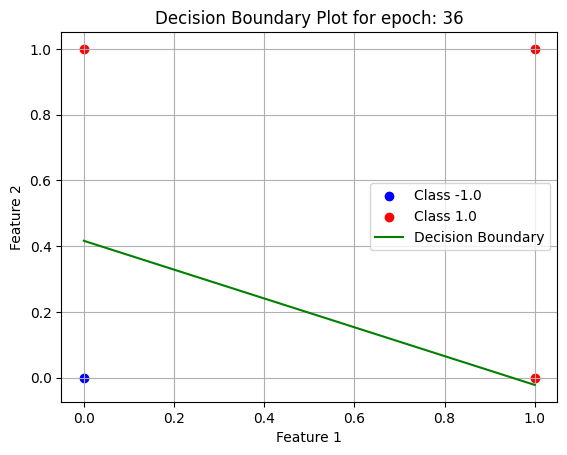

Epoch 37 Trained


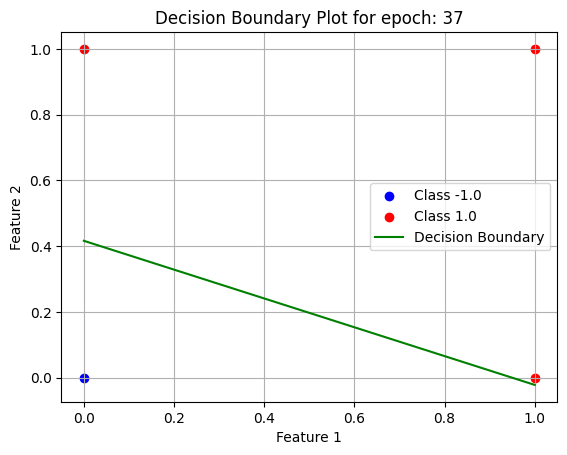

Epoch 38 Trained


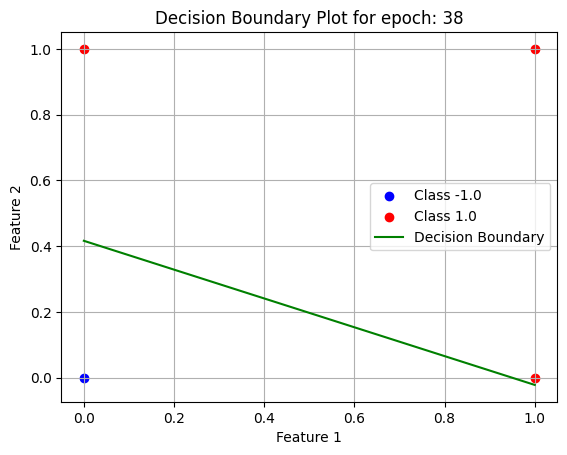

Epoch 39 Trained


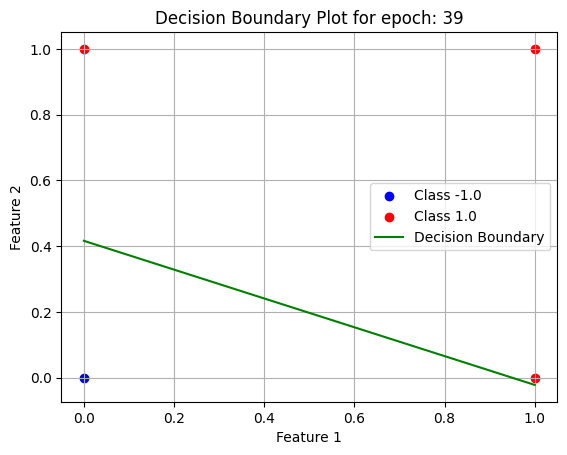

Epoch 40 Trained


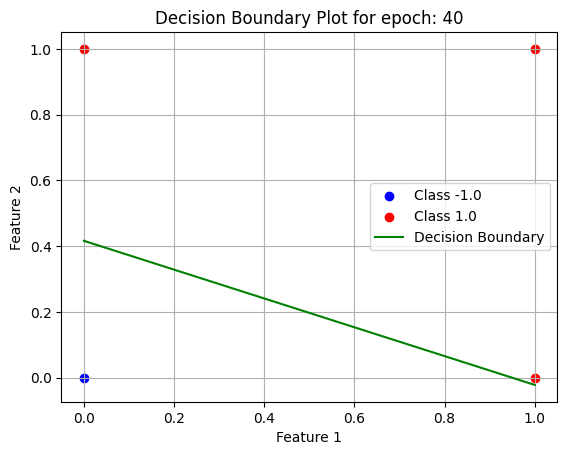

Epoch 41 Trained


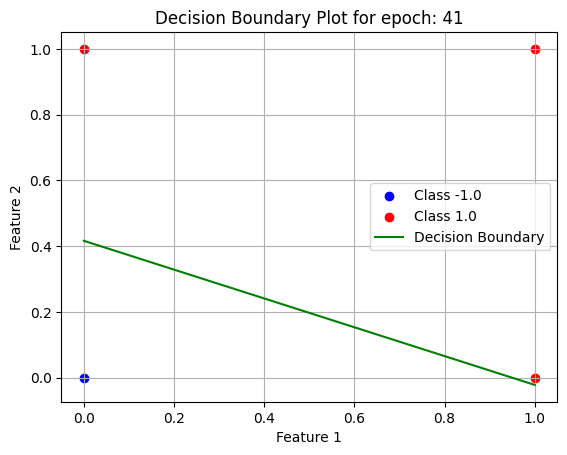

Epoch 42 Trained


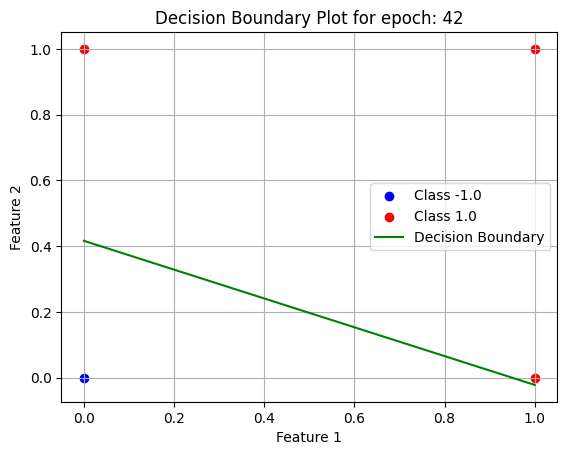

Epoch 43 Trained


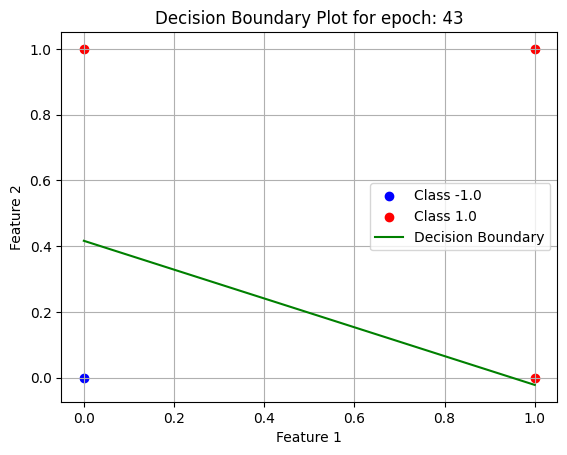

Epoch 44 Trained


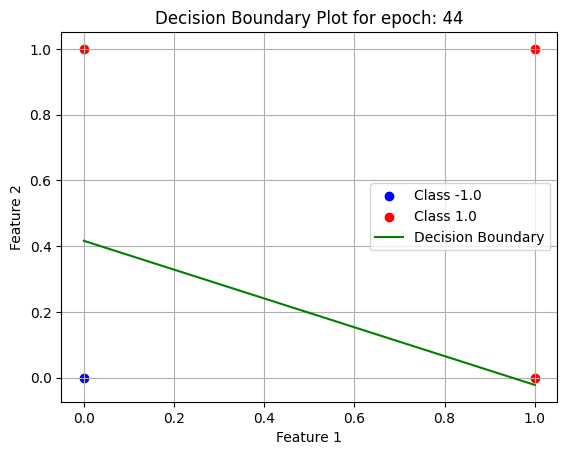

Epoch 45 Trained


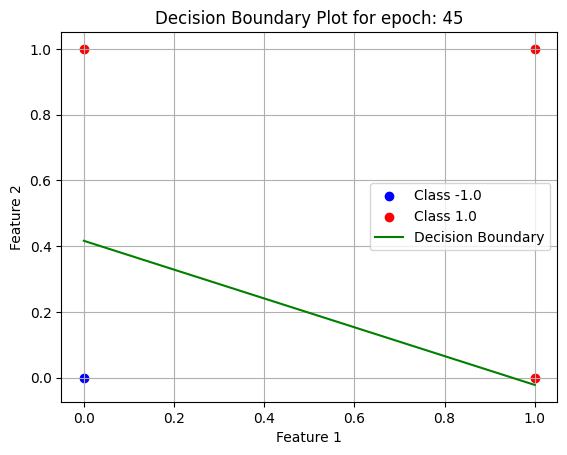

Epoch 46 Trained


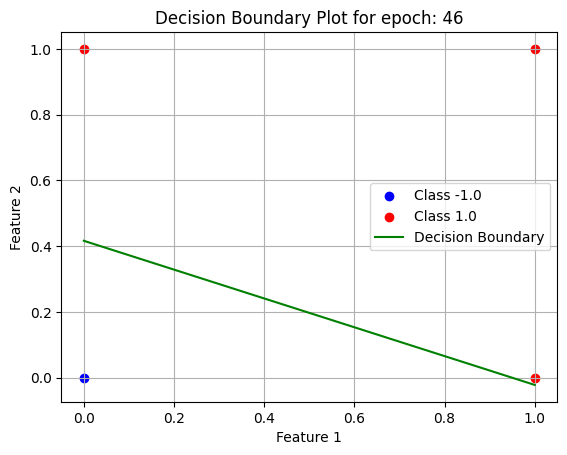

Epoch 47 Trained


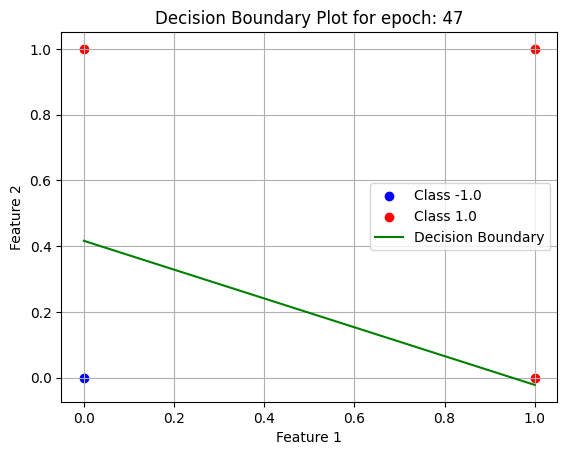

Epoch 48 Trained


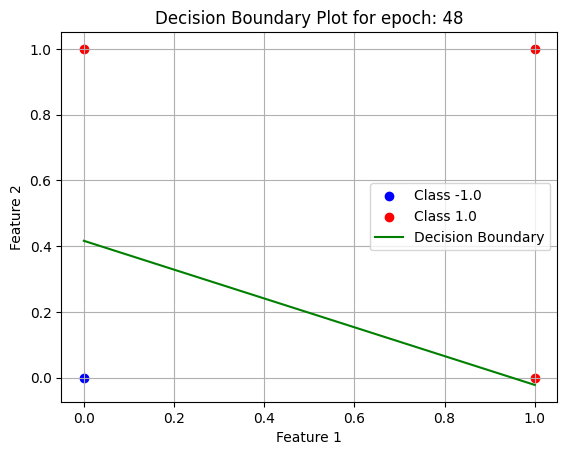

Epoch 49 Trained


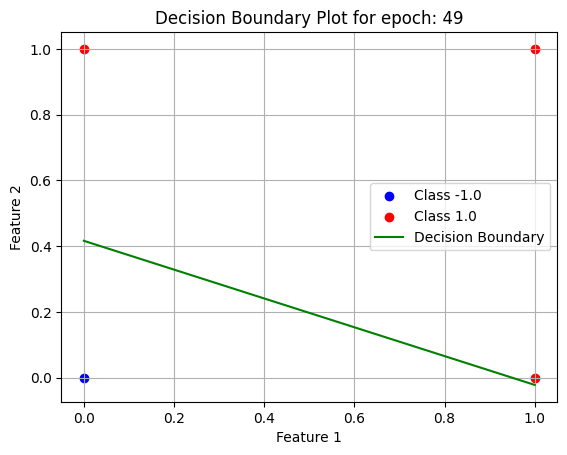

Epoch 50 Trained


In [29]:
import numpy as np


class Perceptron:
    def __init__(self) -> None:
        # Randomly initialize weights and intercept
        self.weights = np.random.randn(2)
        self.intercept = np.random.randn(1)

    # Calculate the weighted sum of inputs
    def _get_weighted_sum(
        self, inputs: np.ndarray, weights: np.ndarray, intercept: np.ndarray
    ) -> np.ndarray:
        return np.dot(inputs, weights) + intercept

    # Predict the output of perceptron
    def predict(self, inputs: np.ndarray) -> np.ndarray:
        # Return 1 if the weighted sum is greater than 0, else return -1
        return np.where(
            self._get_weighted_sum(inputs, self.weights, self.intercept) > 0, 1, -1
        )

    # Train the perceptron with inputs and targets
    def fit(
        self,
        inputs: np.ndarray,
        targets: np.ndarray,
        n_epochs: int = 10,
        verbose_boundary: bool = False,
    ) -> None:
        # Train the perceptron for n_epochs
        for e in range(n_epochs):
            # Plot the decision boundary for each epoch
            if verbose_boundary:
                self._plot_decision_boundary(inputs, targets, e)

            outputs = self.predict(inputs)
            errors = np.where(outputs != targets, 1, 0) * targets
            errors = errors * 0.1
            # Update weights and intercept; using matrix multiplication for batch processing
            self.weights += np.matmul(errors, inputs)
            self.intercept += np.sum(errors)
            print(f"Epoch {e+1} Trained")

    def _plot_decision_boundary(
        self, inputs: np.ndarray, targets: np.ndarray, epoch: int
    ) -> None:
        # Generate data points for the decision boundary line
        x_vals = np.linspace(np.min(inputs[:, 0]), np.max(inputs[:, 0]), 100) #linspace le equal interval ma points nikalxa
        y_vals = -(self.weights[0] / self.weights[1]) * x_vals - (
            self.intercept / self.weights[1]
        ) #

        # Plot the data points
        y_class = np.unique(targets)

        assert len(y_class) == 2, "Only binary classification is supported"

        plt.scatter(
            inputs[targets == y_class[0]][:, 0],
            inputs[targets == y_class[0]][:, 1],
            c="b",
            label=f"Class {y_class[0]}",
        )
        plt.scatter(
            inputs[targets == y_class[1]][:, 0],
            inputs[targets == y_class[1]][:, 1],
            c="r",
            label=f"Class {y_class[1]}",
        )

        # Plot the decision boundary line
        plt.plot(x_vals, y_vals, "g", label="Decision Boundary")

        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.title(f"Decision Boundary Plot for epoch: {epoch}")
        plt.grid(True)
        plt.show()


X = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1],
    ],
    dtype=np.float64,
)
Y = np.array([-1, 1, 1, 1], dtype=np.float64)

model = Perceptron()
model.fit(X, Y, 50, True)

In [ ]:
model.predict(X)